# Random Forest Regression

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from sklearn.preprocessing import robust_scale, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from astropy.io import fits

In [3]:
from ipywidgets import IntProgress
from IPython.display import display

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("seaborn-darkgrid")
plt.rcParams["figure.figsize"] = (16, 9)
plt.rcParams["font.family"] = "DejaVu Sans"
plt.rcParams["image.cmap"] = "Spectral"

In [5]:
SAMPDIR = "/mnt/arch/LAMOST/dr1/sample/"

In [6]:
X = np.load("POLLUX.npy")
y = np.load("pollux.npy")
#Y = MinMaxScaler().fit_transform(y)

In [7]:
%%time
root = RandomForestRegressor(n_estimators=100,n_jobs=3)
root.fit(X, y)
root.score(X, y)

CPU times: user 1h 10min 5s, sys: 7.42 s, total: 1h 10min 12s
Wall time: 25min 45s


In [8]:
Z = root.predict(X)
E = np.sqrt(np.sum((Z-y)**2,axis=1))

([], <a list of 0 Text yticklabel objects>)

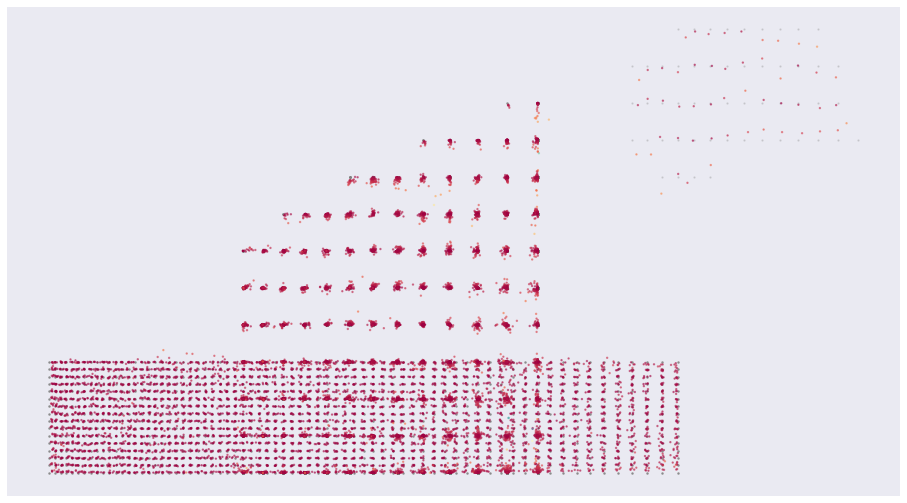

In [9]:
plt.scatter(y[:,0], y[:,1], s=2, c="gray", alpha=0.2)
plt.scatter(Z[:,0], Z[:,1], s=2, c=E, alpha=0.5)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xticks([])
plt.yticks([])
#plt.colorbar();

In [10]:
lamost = open("lamost.lst").readlines()
LAMOST = np.load("lamost.npy")
PREDIC = np.zeros_like(LAMOST)
#MINMAX = MinMaxScaler()#.fit(y)
#OUTFIT = MINMAX.fit_transform(LAMOST)
prog = IntProgress(min=0, max=len(lamost))
display(prog)
for i, lama in enumerate(lamost):
    lama = lama.strip()
    samp = SAMPDIR+lama+".fits"
    spec = fits.getdata(samp)[0]
    robo = robust_scale(spec)
    nume = 4096 - len(spec)
    full = np.append(robo, np.zeros(nume)).reshape(1,-1)
    PREDIC[i,:] = root.predict(full)
    prog.value += 1
ERROR = np.sqrt(np.sum((LAMOST-PREDIC)**2, axis=1))

IntProgress(value=0, max=42153)

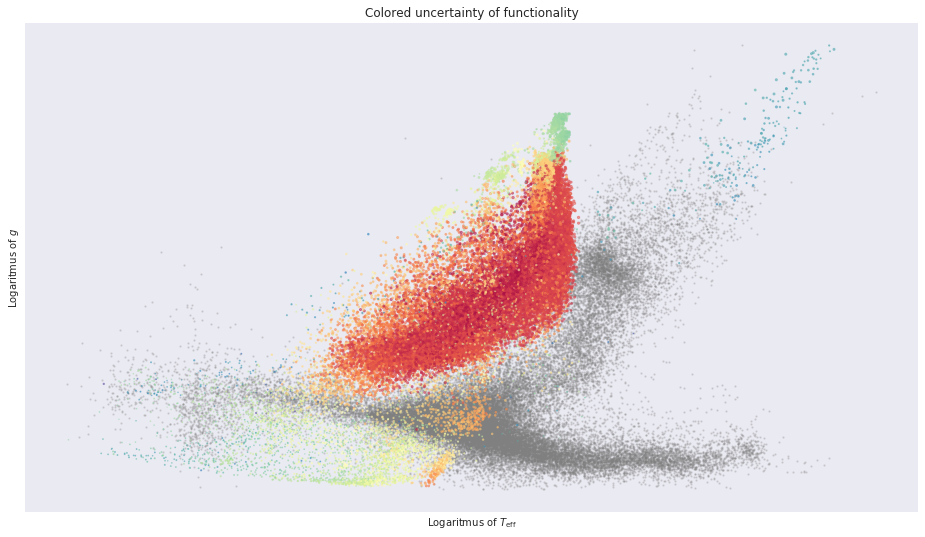

In [11]:
plt.title("Colored uncertainty of functionality")
plt.xlabel("Logaritmus of $T_\mathrm{eff}$")
plt.ylabel("Logaritmus of $g$")
plt.xticks([]); plt.yticks([])
#plt.colorbar()#.ax.set_ylabel("Fe/H");
plt.scatter(LAMOST[:,0], LAMOST[:,1], c="gray", s=2, alpha=0.2)
plt.scatter(PREDIC[:,0], PREDIC[:,1], c=PREDIC[:,2], s=ERROR, alpha=0.5)
plt.gca().invert_xaxis(); plt.gca().invert_yaxis();